In [ ]:
import os
import zipfile
import cv2
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
lst = os.listdir(r"/content/sumesh-dataset/sign") # your directory path
number_files = len(lst)
print(number_files)


1628


In [ ]:
import tensorflow 
import numpy as np
import datetime
import os 
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
!unzip -q  "/content/drive/MyDrive/Design-unsign/inference.zip" -d "/content/drive/MyDrive/Design-unsign/inference"

In [ ]:
train_cls = ImageDataGenerator(rescale = 1/256)
train = train_cls.flow_from_directory("/content/drive/MyDrive/Design-unsign/train",target_size = (224,224),batch_size = 100,class_mode ='binary')

Found 46978 images belonging to 2 classes.


In [ ]:
#/content/drive/MyDrive/Design-unsign/inference


In [ ]:
inference = train_cls.flow_from_directory("/content/drive/MyDrive/Design-unsign/inference",target_size = (224,224),batch_size = 100,class_mode ='binary')

Found 6000 images belonging to 2 classes.


In [ ]:
valid_cls = ImageDataGenerator(rescale = 1/256)
valid = valid_cls.flow_from_directory("/content/drive/MyDrive/Design-unsign/val",target_size = (224,224),batch_size = 100,class_mode ='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
lst = os.listdir(r"/content/drive/MyDrive/Design-unsign/val") # your directory path
number_files = len(lst)
print(number_files)


2


In [ ]:
!rm -r /content/drive/MyDrive/DL-final/valid_cls/valid/.ipynb_checkpoints

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping=tensorflow.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=5)

In [ ]:
from keras.callbacks import TensorBoard
import os
from datetime import datetime
#create a function to build a tensorboard callback
def create_tensorboard_callback():
  # create a log directory for storing tensotboard logs
  logdir=os.path.join("/content/drive/MyDrive/Design-unsign/logs",
                      #make it so the logs gets tracked whenever we run an expriment
                      datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tensorflow.keras.callbacks.TensorBoard(logdir)

In [ ]:
tensorboard=create_tensorboard_callback()

In [ ]:
neural_net.fit(train, epochs=1,validation_data = valid)

470/470 [==============================] - 11742s 25s/step - loss: 0.3056 - accuracy: 0.8780 - val_loss: 0.8061 - val_accuracy: 0.5635


In [ ]:
neural_net.evaluate(inference,verbose = 1)


 2/60 [>.............................] - ETA: 21:11 - loss: 0.4269 - accuracy: 0.7950

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

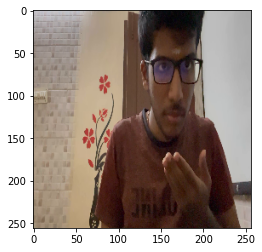

[[0.]]
un signed


In [ ]:
from tensorflow.keras. preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/content/drive/MyDrive/Datasets/Read/inf0434.png"

img= image.load_img(dir_path, target_size =(256,256,3))
plt.imshow(img)
plt.show()
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
    
val = model.predict(images)
print(val)
for i in range (1):
  if val == 1:
    print("signed")
  else:
    print("un signed")

In [ ]:
!mkdir -p /content/drive/MyDrive/DL data2/saved_model



In [ ]:
model.save('/content/drive/MyDrive/Design-unsign/Sumesh_model/sumesh_model.h5') 

In [ ]:
import tensorflow as tf
model2 = tf.keras.models.load_model('/content/drive/MyDrive/DL data2/saved_model/my_model')


In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

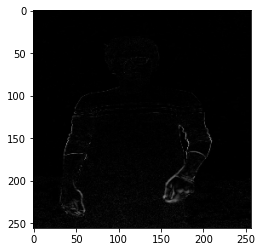

[[1.]]
signed


In [ ]:
from tensorflow.keras. preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/content/drive/MyDrive/DL data2/absdiff/1000.png"

img= image.load_img(dir_path, target_size =(256,256,3))
plt.imshow(img)
plt.show()
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
    
val = model2.predict(images)
print(val)
for i in range (1):
  if val == 1:
    print("signed")
  else:
    print("un signed")

In [ ]:
import tensorflow as tf
model2 = tf.keras.models.load_model('/content/drive/MyDrive/DL data2/saved_model/my_model')


In [ ]:
model2.evaluate(inference,verbose = 1)


 7/60 [==>...........................] - ETA: 23:14 - loss: 9.3439 - accuracy: 0.1871

KeyboardInterrupt: ignored